# Mini project 2 

The purpose of the Mini Project is to reinforce skills that have been covered in recent modules. Select a data set and analyse it using the techniques learned in recent modules. Prepare and present a 10-minute PowerPoint presentation and a 5-minute jupyter notebook presentation in class.
Things to consider:
1. Application of your choice
2. Dataset that is not tidy
3. Feature selection
4. Visualization
5. Machine learning models (at least 3)
* Logistic Regression
* Naive Bayes
* Random Forrests
6. Performance metric
7. Hyperparameter tuning

Data for 375,000+ Kickstarter projects from 2009-2017

Including project name, category, launch date, deadline, goal, amount pledged, number of backers, state, and country.

* What are the key influences for the project being successful or failing?
* Can you predict a Kickstarter project reaching it's target goal?

	Field	Description
* 1	ID	Internal kickstarter id
* 2	Name	Name of the project
* 3	Category	Project category
* 4	Subcategory	Project subcategory
* 5	Country	Country the project is from
* 6	Launched	Date the project was launched
* 7	Deadline	Deadline date for crowdfunding
* 8	Goal	Amount of money the creator needs to complete the project (USD)
* 9	Pledged	Amount of money pledged by the crowd (USD)
* 10	Backers	Number of backers
* 11	State	Current condition the project is in (as of 2018-01-02)

# Import modules

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime 
import time
import category_encoders as ce
import sklearn
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score


## EDA / Feature Engineering

In [9]:
dfKickstart = pd.read_csv('kickstarter_projects.csv')

In [10]:
dfKickstart.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [11]:
dfKickstart.sample(20)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
196824,1756220163,Suit Up! (Suspended),Fashion,Apparel,United States,2015-01-28 20:42:58,2015-02-27,2000,0,0,Suspended
68713,1229429795,Dragon Bones: the Future of Electronic Fun (Ca...,Games,Video Games,United States,2012-09-13 22:58:03,2012-10-13,1625000,125,2,Canceled
164144,620848668,"Michael Susten & Company ""Fall""",Dance,Dance,United States,2014-08-13 15:01:54,2014-10-11,3000,3170,26,Successful
295898,1356564941,Vosofferyn FricBric Friction Folding Blade / B...,Design,Product Design,United States,2016-06-24 21:01:08,2016-07-15,10000,43610,124,Successful
223690,144967298,SmartMatrix - Dynamic LED Art Display and Musi...,Technology,Gadgets,United States,2015-05-16 18:30:43,2015-06-15,30000,12054,89,Failed
168805,585180952,"""Faithful - Music Video!"" - My First Video!!!!...",Film & Video,Music Videos,United States,2014-09-04 05:46:57,2014-10-04,5000,0,0,Canceled
371647,367067117,Franken-Girls,Design,Product Design,United States,2017-11-28 22:50:08,2017-12-28,20000,75,2,Failed
194098,1313849000,The Last Reward,Film & Video,Animation,New Zealand,2015-01-18 12:19:34,2015-02-17,3776,109,4,Failed
365521,1980991680,Beyond the Hate,Film & Video,Documentary,Canada,2017-10-19 18:28:37,2017-11-18,7869,119,3,Failed
333723,1903417071,The Coldest Day of the Year,Publishing,Fiction,United States,2017-03-16 00:24:05,2017-03-23,3000,3570,94,Successful


In [12]:
dfKickstart['State'].value_counts()

State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [13]:
dfKickstart.isna().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [14]:
dfKickstart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [15]:
dfKickstart['Country'].value_counts()

Country
United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Mexico              1752
New Zealand         1447
Denmark             1113
Ireland              811
Switzerland          760
Norway               708
Hong Kong            618
Belgium              617
Austria              597
Singapore            555
Luxembourg            62
Japan                 40
Name: count, dtype: int64

In [16]:
dfKickstart['Country'] = dfKickstart['Country'].str.replace(' ', '_')

In [17]:
dfKickstart['Country'].value_counts()

Country
United_States     292618
United_Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands_        2868
Spain               2276
Sweden              1757
Mexico              1752
New_Zealand         1447
Denmark             1113
Ireland              811
Switzerland          760
Norway               708
Hong_Kong            618
Belgium              617
Austria              597
Singapore            555
Luxembourg            62
Japan                 40
Name: count, dtype: int64

In [18]:
dfKickstart.shape

(374853, 11)

In [19]:
dfKickstart.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United_States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United_States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United_States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United_States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United_States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [20]:
dfKickstart['State'].value_counts()

State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [21]:
dfKickstart.replace({'State': {'Canceled': 'Cancelled'}}, inplace=True)

In [22]:
dfKickstart['State'].value_counts()

State
Failed        197611
Successful    133851
Cancelled      38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [23]:
dfKickstart.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United_States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United_States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United_States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United_States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United_States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [24]:
dfKickstart['Category'].value_counts()

Category
Film & Video    62694
Music           49529
Publishing      39378
Games           35225
Technology      32562
Design          30065
Art             28151
Food            24599
Fashion         22812
Theater         10911
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: count, dtype: int64

In [25]:
dfKickstart['Subcategory'].value_counts()

Subcategory
Product Design     22310
Documentary        16138
Tabletop Games     14178
Music              13339
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: count, Length: 159, dtype: int64

In [26]:
dfKickstart['Goal'].mean()

45863.78479563989

In [27]:
dfKickstart.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [28]:
dfKickstart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


Combine columns Launched and Deadline to form new column Duration to represent the length of the Kickstarter project in days

In [30]:
dfKickstart['Launched'] = pd.to_datetime(dfKickstart['Launched']).dt.date

In [31]:
dfKickstart['Deadline'] = pd.to_datetime(dfKickstart['Deadline']).dt.date

In [32]:
dfKickstart['Duration'] = (dfKickstart['Deadline'] - dfKickstart['Launched'])

In [33]:
dfKickstart.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Duration
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United_States,2009-04-21,2009-05-31,1000,625,30,Failed,"40 days, 0:00:00"
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United_States,2009-04-23,2009-07-20,80000,22,3,Failed,"88 days, 0:00:00"
2,1703704063,drawing for dollars,Art,Illustration,United_States,2009-04-24,2009-05-03,20,35,3,Successful,"9 days, 0:00:00"
3,727286,Offline Wikipedia iPhone app,Technology,Software,United_States,2009-04-25,2009-07-14,99,145,25,Successful,"80 days, 0:00:00"
4,1622952265,Pantshirts,Fashion,Fashion,United_States,2009-04-27,2009-05-26,1900,387,10,Failed,"29 days, 0:00:00"


In [34]:
dfKickstart['Duration'] = dfKickstart['Duration'].apply(lambda x: x.days)

In [35]:
dfKickstart.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Duration
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United_States,2009-04-21,2009-05-31,1000,625,30,Failed,40
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United_States,2009-04-23,2009-07-20,80000,22,3,Failed,88
2,1703704063,drawing for dollars,Art,Illustration,United_States,2009-04-24,2009-05-03,20,35,3,Successful,9
3,727286,Offline Wikipedia iPhone app,Technology,Software,United_States,2009-04-25,2009-07-14,99,145,25,Successful,80
4,1622952265,Pantshirts,Fashion,Fashion,United_States,2009-04-27,2009-05-26,1900,387,10,Failed,29


Move column to be in between Deadline and Goal, unsure if this is necessary but seems more tidy having target variable at the end

In [37]:
moveDuration = ['ID', 
                'Name', 
                'Category', 
                'Subcategory',	
                'Country',
                'Launched',	
                'Deadline', 
                'Duration',	
                'Goal', 
                'Pledged', 
                'Backers', 
                'State']	       

In [38]:
dfKickstart = dfKickstart[moveDuration]

In [39]:
dfKickstart.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Duration,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United_States,2009-04-21,2009-05-31,40,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United_States,2009-04-23,2009-07-20,88,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United_States,2009-04-24,2009-05-03,9,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United_States,2009-04-25,2009-07-14,80,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United_States,2009-04-27,2009-05-26,29,1900,387,10,Failed


In [40]:
dfKickstart.drop(['ID', 'Launched', 'Deadline', 'Name'], axis=1, inplace=True)

In [41]:
dfKickstart['State'].value_counts()

State
Failed        197611
Successful    133851
Cancelled      38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [42]:
dfKickstart.head()

,Category,Subcategory,Country,Duration,Goal,Pledged,Backers,State
0,Fashion,Fashion,United_States,40,1000,625,30,Failed
1,Film & Video,Shorts,United_States,88,80000,22,3,Failed
2,Art,Illustration,United_States,9,20,35,3,Successful
3,Technology,Software,United_States,80,99,145,25,Successful
4,Fashion,Fashion,United_States,29,1900,387,10,Failed


In [43]:
dfKickstart['State'] = dfKickstart['State'].replace('Cancelled',
                                                    'Failed')  
dfKickstart['State'] = dfKickstart['State'].replace('Suspended',
                                                    'Failed')  

In [44]:
dfKickstart['State'].value_counts()

State
Failed        238204
Successful    133851
Live            2798
Name: count, dtype: int64

Remove Live value from the target variable State as it's less than one perecent of the entire database 

In [46]:
dfKickstart.drop(dfKickstart.index[(dfKickstart['State'] == 'Live')], axis = 0, inplace=True)

In [47]:
dfKickstart['State'].value_counts()

State
Failed        238204
Successful    133851
Name: count, dtype: int64

Convert State column values into a binary value 
* 0 = Failed
* 1 = Successful

In [49]:
pd.set_option('future.no_silent_downcasting', True)

In [50]:
dfKickstart.replace({'State': {'Failed': 0, 'Successful': 1}}, inplace=True)

In [51]:
dfKickstart.describe()

,Duration,Goal,Pledged,Backers
count,372055.000000,3.720550e+05,3.720550e+05,372055.000000
mean,34.175114,4.573831e+04,9.145513e+03,106.980393
std,12.793438,1.151699e+06,9.162231e+04,914.532666
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,30.000000,2.000000e+03,3.100000e+01,2.000000
50%,30.000000,5.500000e+03,6.280000e+02,12.000000
75%,37.000000,1.600000e+04,4.066000e+03,57.000000
max,92.000000,1.663614e+08,2.033899e+07,219382.000000


In [52]:
dfKickstart['State'].value_counts()

State
0    238204
1    133851
Name: count, dtype: int64

In [53]:
dfKickstart['State'] = pd.to_numeric(dfKickstart['State'])

In [54]:
dfKickstart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372055 entries, 0 to 374823
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Category     372055 non-null  object
 1   Subcategory  372055 non-null  object
 2   Country      372055 non-null  object
 3   Duration     372055 non-null  int64 
 4   Goal         372055 non-null  int64 
 5   Pledged      372055 non-null  int64 
 6   Backers      372055 non-null  int64 
 7   State        372055 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 25.5+ MB


### Convert categorical columns using target encoding 

In [56]:
dfKickstart.head()

,Category,Subcategory,Country,Duration,Goal,Pledged,Backers,State
0,Fashion,Fashion,United_States,40,1000,625,30,0
1,Film & Video,Shorts,United_States,88,80000,22,3,0
2,Art,Illustration,United_States,9,20,35,3,1
3,Technology,Software,United_States,80,99,145,25,1
4,Fashion,Fashion,United_States,29,1900,387,10,0


In [57]:
encoder_cat = ce.TargetEncoder(cols='Category')

In [58]:
encoder_subcat = ce.TargetEncoder(cols='Subcategory')

In [59]:
encoder_country = ce.TargetEncoder(cols='Country')

In [60]:
encoder_cat.fit_transform(dfKickstart['Category'], dfKickstart['State'])

,Category
0,0.247895
1,0.378628
2,0.411704
3,0.199876
4,0.247895
...,...
374605,0.489462
374635,0.214271
374703,0.358292
374731,0.543796


In [61]:
encoder_subcat.fit_transform(dfKickstart['Subcategory'], dfKickstart['State'])

,Subcategory
0,0.256988
1,0.542036
2,0.518826
3,0.123011
4,0.256988
...,...
374605,0.155155
374635,0.086914
374703,0.559062
374731,0.595572


In [62]:
encoder_country.fit_transform(dfKickstart['Country'], dfKickstart['State'])

,Country
0,0.375755
1,0.375755
2,0.375755
3,0.375755
4,0.375755
...,...
374605,0.258721
374635,0.375755
374703,0.375755
374731,0.361374


In [63]:
dfKickstart['Category_encoded'] = encoder_cat.fit_transform(dfKickstart['Category'], dfKickstart['State'])

In [64]:
dfKickstart['Subcategory_encoded'] = encoder_subcat.fit_transform(dfKickstart['Subcategory'], dfKickstart['State'])

In [65]:
dfKickstart['Country_encoded'] = encoder_country.fit_transform(dfKickstart['Country'], dfKickstart['State'])

In [66]:
dfKickstart.head()

,Category,Subcategory,Country,Duration,Goal,Pledged,Backers,State,Category_encoded,Subcategory_encoded,Country_encoded
0,Fashion,Fashion,United_States,40,1000,625,30,0,0.247895,0.256988,0.375755
1,Film & Video,Shorts,United_States,88,80000,22,3,0,0.378628,0.542036,0.375755
2,Art,Illustration,United_States,9,20,35,3,1,0.411704,0.518826,0.375755
3,Technology,Software,United_States,80,99,145,25,1,0.199876,0.123011,0.375755
4,Fashion,Fashion,United_States,29,1900,387,10,0,0.247895,0.256988,0.375755


In [67]:
moveCategory = ['Category',
                'Category_encoded',
                'Subcategory',
                'Subcategory_encoded',
                'Country',
                'Country_encoded',
                'Duration',
                'Goal',
                'Pledged',
                'Backers',
                'State']

In [68]:
dfKickstart = dfKickstart[moveCategory]

In [69]:
dfKickstart.head()

,Category,Category_encoded,Subcategory,Subcategory_encoded,Country,Country_encoded,Duration,Goal,Pledged,Backers,State
0,Fashion,0.247895,Fashion,0.256988,United_States,0.375755,40,1000,625,30,0
1,Film & Video,0.378628,Shorts,0.542036,United_States,0.375755,88,80000,22,3,0
2,Art,0.411704,Illustration,0.518826,United_States,0.375755,9,20,35,3,1
3,Technology,0.199876,Software,0.123011,United_States,0.375755,80,99,145,25,1
4,Fashion,0.247895,Fashion,0.256988,United_States,0.375755,29,1900,387,10,0


In [70]:
dfNumeric = dfKickstart[['Category_encoded', 'Subcategory_encoded', 'Country_encoded', 'Duration', 'Goal', 'Pledged', 'Backers', 'State']]

In [71]:
dfNumeric.head()

,Category_encoded,Subcategory_encoded,Country_encoded,Duration,Goal,Pledged,Backers,State
0,0.247895,0.256988,0.375755,40,1000,625,30,0
1,0.378628,0.542036,0.375755,88,80000,22,3,0
2,0.411704,0.518826,0.375755,9,20,35,3,1
3,0.199876,0.123011,0.375755,80,99,145,25,1
4,0.247895,0.256988,0.375755,29,1900,387,10,0


In [72]:
dfNumeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372055 entries, 0 to 374823
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Category_encoded     372055 non-null  float64
 1   Subcategory_encoded  372055 non-null  float64
 2   Country_encoded      372055 non-null  float64
 3   Duration             372055 non-null  int64  
 4   Goal                 372055 non-null  int64  
 5   Pledged              372055 non-null  int64  
 6   Backers              372055 non-null  int64  
 7   State                372055 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 25.5 MB


In [73]:
dfNumeric.corr()

,Category_encoded,Subcategory_encoded,Country_encoded,Duration,Goal,Pledged,Backers,State
Category_encoded,1.000000,0.708752,0.113159,0.011221,-0.010758,-0.025592,-0.013134,0.213796
Subcategory_encoded,0.708752,1.000000,0.113326,-0.017046,-0.017232,0.009553,0.013934,0.297941
Country_encoded,0.113159,0.113326,1.000000,-0.002739,-0.005577,0.008448,0.011349,0.085219
Duration,0.011221,-0.017046,-0.002739,1.000000,0.022565,0.006962,-0.001617,-0.118265
Goal,-0.010758,-0.017232,-0.005577,0.022565,1.000000,0.005638,0.004542,-0.023563
Pledged,-0.025592,0.009553,0.008448,0.006962,0.005638,1.000000,0.753399,0.110606
Backers,-0.013134,0.013934,0.011349,-0.001617,0.004542,0.753399,1.000000,0.128809
State,0.213796,0.297941,0.085219,-0.118265,-0.023563,0.110606,0.128809,1.000000


## Function

In [75]:
# Create an image tag for loop
imageTag = []
for i in range(60):
    if(i<= 60):
        img= f'image0{i}'
        imageTag.append(img)
imageTag

['image00',
 'image01',
 'image02',
 'image03',
 'image04',
 'image05',
 'image06',
 'image07',
 'image08',
 'image09',
 'image010',
 'image011',
 'image012',
 'image013',
 'image014',
 'image015',
 'image016',
 'image017',
 'image018',
 'image019',
 'image020',
 'image021',
 'image022',
 'image023',
 'image024',
 'image025',
 'image026',
 'image027',
 'image028',
 'image029',
 'image030',
 'image031',
 'image032',
 'image033',
 'image034',
 'image035',
 'image036',
 'image037',
 'image038',
 'image039',
 'image040',
 'image041',
 'image042',
 'image043',
 'image044',
 'image045',
 'image046',
 'image047',
 'image048',
 'image049',
 'image050',
 'image051',
 'image052',
 'image053',
 'image054',
 'image055',
 'image056',
 'image057',
 'image058',
 'image059']

In [76]:
# Create savePlotFunction to save images
def savePlotFunction(imageRef):
    plt.savefig(f'{imageTag[imageRef]}.png', facecolor = 'w', bbox_inches= 'tight',
                pad_inches=0.3, transparent= True)
    plt.show()
    return

## Visualization

In [78]:
corr01 = dfNumeric.corr()
corr01.style.background_gradient(cmap= 'coolwarm')
savePlotFunction(2)

<Figure size 640x480 with 0 Axes>

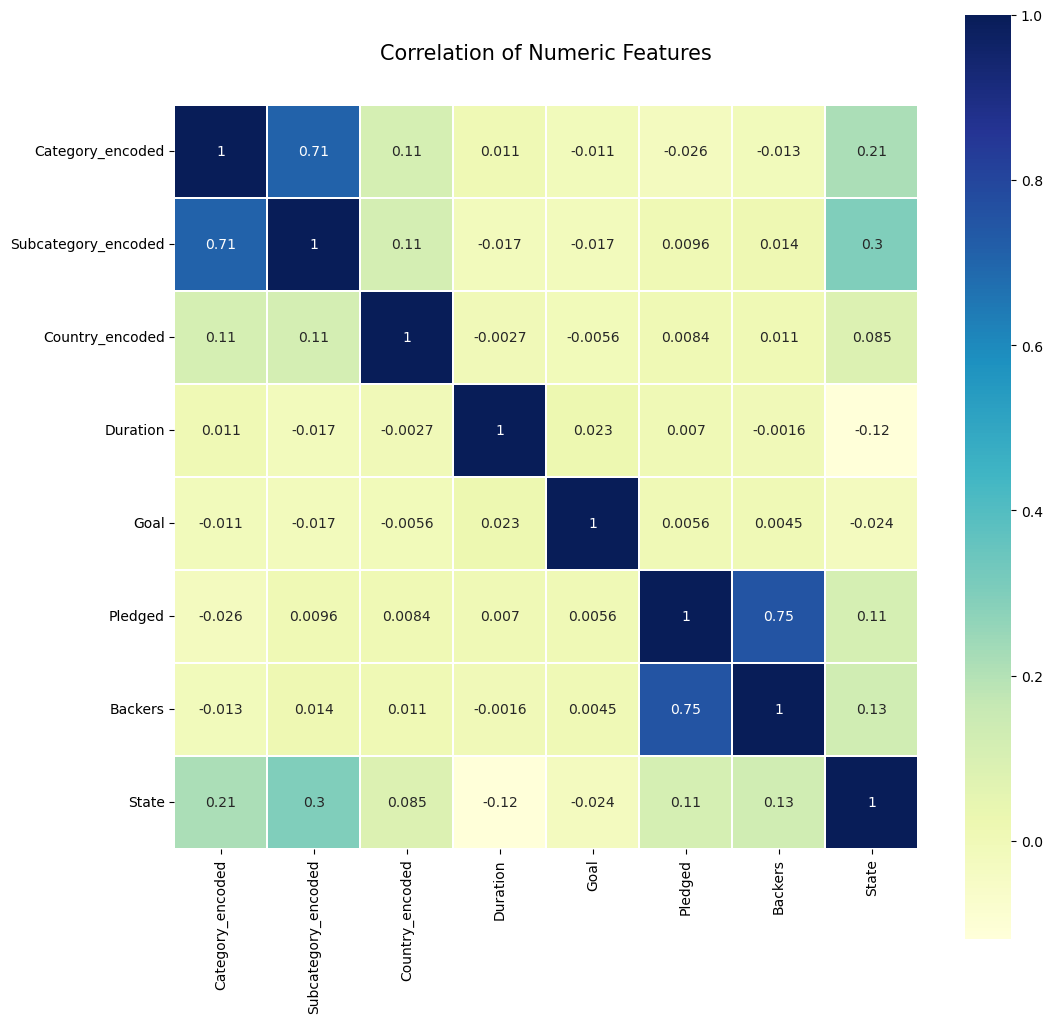

In [79]:
f, ax = plt.subplots(figsize=(12,12))
camp = sns.diverging_palette(220, 10, as_cmap=True)
_=sns.heatmap(corr01, cmap='YlGnBu', square=True, ax=ax, annot=True, linewidth=0.1)
plt.title('Correlation of Numeric Features', y=1.05, size=15)
savePlotFunction(3)

Total time took close to 13 minutes to show pairplot

<Figure size 640x480 with 0 Axes>

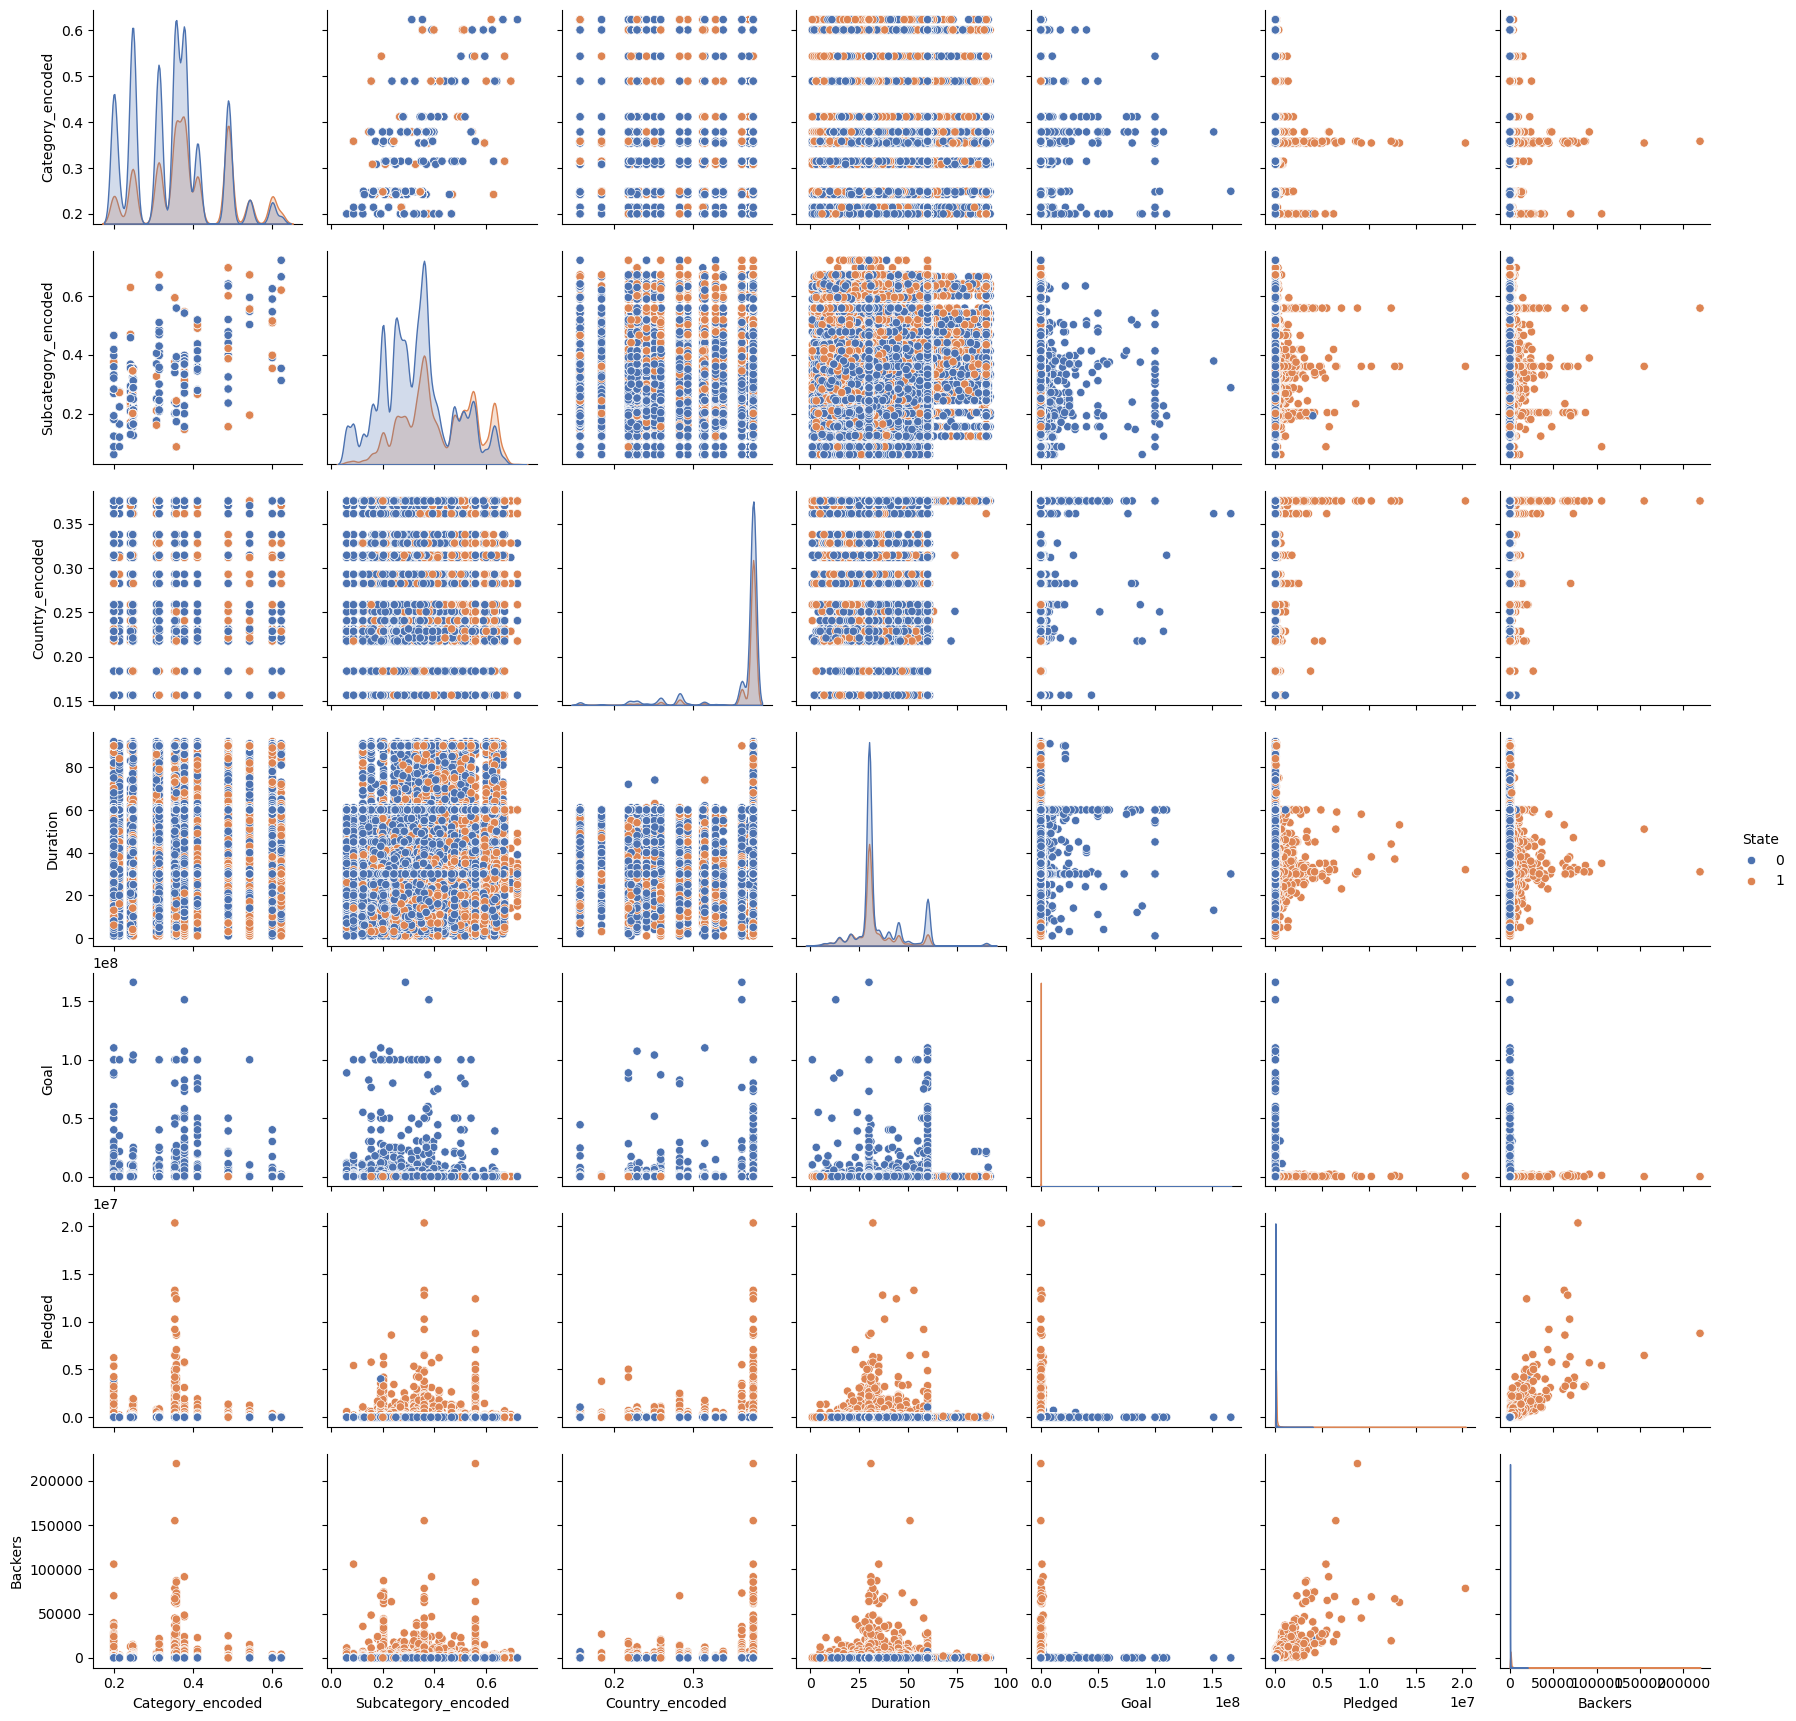

CPU times: total: 17min 50s
Wall time: 17min 48s


In [81]:
%%time
plt.figure(figure= (8,6))
sns.pairplot(data=dfNumeric, hue='State', palette='deep')
savePlotFunction(4)

In [82]:
dfNumeric.head()

,Category_encoded,Subcategory_encoded,Country_encoded,Duration,Goal,Pledged,Backers,State
0,0.247895,0.256988,0.375755,40,1000,625,30,0
1,0.378628,0.542036,0.375755,88,80000,22,3,0
2,0.411704,0.518826,0.375755,9,20,35,3,1
3,0.199876,0.123011,0.375755,80,99,145,25,1
4,0.247895,0.256988,0.375755,29,1900,387,10,0


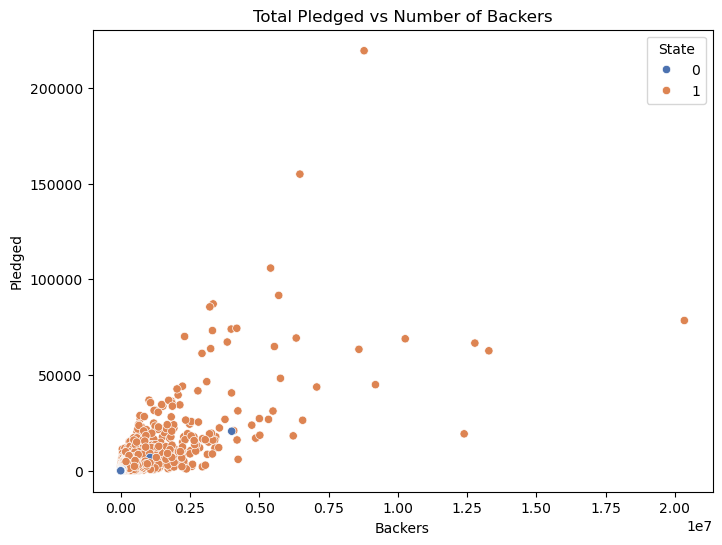

In [83]:
plt.figure(figsize= (8,6))
sns.scatterplot(data=dfNumeric, x= dfNumeric['Pledged'], y = dfNumeric['Backers'],
                hue="State", palette='deep').set(title= 'Total Pledged vs Number of Backers',
                                             xlabel= 'Backers', ylabel= 'Pledged')
savePlotFunction(2)

In [84]:
dfState = dfKickstart['State']

In [85]:
dfState.value_counts()

State
0    238204
1    133851
Name: count, dtype: int64

In [86]:
dfStateValueCount = dfState.value_counts()

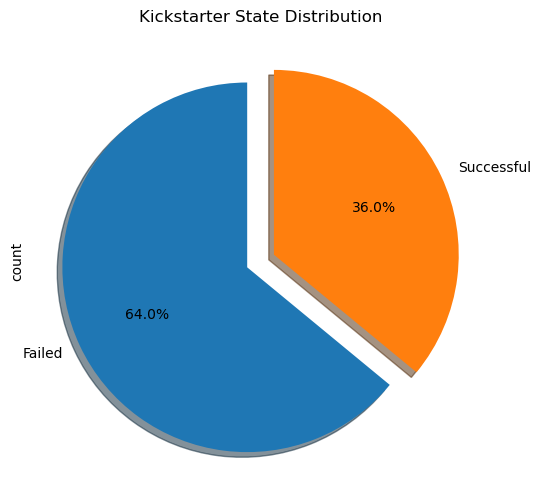

In [87]:
# Create a pie chart to show the difference between State values
explode = [0.08, 0.08]
labels = ['Failed', 'Successful']
# Plot pie chart
dfStateValueCount.plot.pie(labels=labels,autopct='%1.1f%%',figsize=(6, 6), startangle=90,
                       color='colorblind',explode=explode, shadow=True,title='Kickstarter State Distribution')
# Display pie chart
savePlotFunction(5)

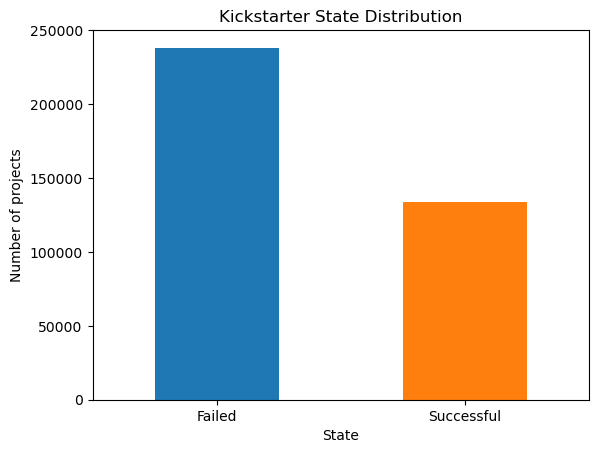

In [88]:
ax = dfStateValueCount.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
                         

plt.title('Kickstarter State Distribution')
plt.xlabel('State')
plt.ylabel('Number of projects')
plt.xticks(ticks=[0, 1], labels=['Failed', 'Successful'], rotation=0)


savePlotFunction(6)

In [89]:
dfNumeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372055 entries, 0 to 374823
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Category_encoded     372055 non-null  float64
 1   Subcategory_encoded  372055 non-null  float64
 2   Country_encoded      372055 non-null  float64
 3   Duration             372055 non-null  int64  
 4   Goal                 372055 non-null  int64  
 5   Pledged              372055 non-null  int64  
 6   Backers              372055 non-null  int64  
 7   State                372055 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 25.5 MB


In [90]:
dfCountryState = dfKickstart.groupby('Country')['State'].value_counts(normalize=True).unstack()
dfCountryState

State,0,1
Country,,
Australia,0.741279,0.258721
Austria,0.816151,0.183849
Belgium,0.748760,0.251240
Canada,0.717314,0.282686
Denmark,0.671832,0.328168
France,0.685487,0.314513
Germany,0.771240,0.228760
Hong_Kong,0.629503,0.370497
Ireland,0.741250,0.258750


In [91]:
dfResetCountryState = dfCountryState.reset_index().rename(columns={0: 'Failed', 1: 'Success'})
dfResetCountryState

State,Country,Failed,Success
0,Australia,0.741279,0.258721
1,Austria,0.816151,0.183849
2,Belgium,0.748760,0.251240
3,Canada,0.717314,0.282686
4,Denmark,0.671832,0.328168
5,France,0.685487,0.314513
6,Germany,0.771240,0.228760
7,Hong_Kong,0.629503,0.370497
8,Ireland,0.741250,0.258750
9,Italy,0.843326,0.156674


In [92]:
dfResetCountryState = dfResetCountryState.sort_values(by=['Success', 'Failed'], ascending=[True, False])

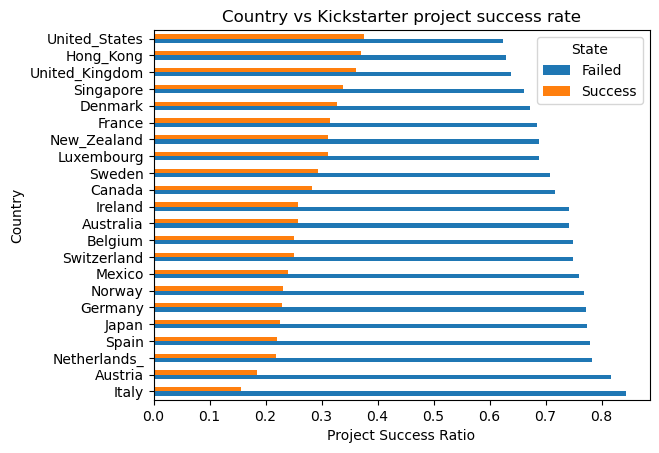

In [93]:
# Plot hortizontal barchart
ax = dfResetCountryState.plot.barh(x='Country', y=['Failed', 'Success'])

# Title, x and y axis labels
ax.set_xlabel('Project Success Ratio')
ax.set_ylabel('Country')
ax.set_title('Country vs Kickstarter project success rate')

savePlotFunction(7)

In [94]:
dfCatState = dfKickstart.groupby('Category')['State'].value_counts(normalize=True).unstack()
dfCatState

State,0,1
Category,,
Art,0.588296,0.411704
Comics,0.456204,0.543796
Crafts,0.757815,0.242185
Dance,0.376367,0.623633
Design,0.645531,0.354469
Fashion,0.752105,0.247895
Film & Video,0.621372,0.378628
Food,0.750778,0.249222
Games,0.641708,0.358292


In [95]:
dfResetCatState = dfCatState.reset_index().rename(columns={0: 'Failed', 1: 'Success'})
dfResetCatState

State,Category,Failed,Success
0,Art,0.588296,0.411704
1,Comics,0.456204,0.543796
2,Crafts,0.757815,0.242185
3,Dance,0.376367,0.623633
4,Design,0.645531,0.354469
5,Fashion,0.752105,0.247895
6,Film & Video,0.621372,0.378628
7,Food,0.750778,0.249222
8,Games,0.641708,0.358292
9,Journalism,0.785729,0.214271


In [96]:
dfResetCatState.describe()

State,Failed,Success
count,15.000000,15.000000
mean,0.630847,0.369153
std,0.138955,0.138955
min,0.376367,0.199876
25%,0.549417,0.248558
50%,0.645531,0.354469
75%,0.751442,0.450583
max,0.800124,0.623633


In [97]:
dfResetCatState = dfResetCatState.sort_values(by=['Success', 'Failed'], ascending=[True, False])

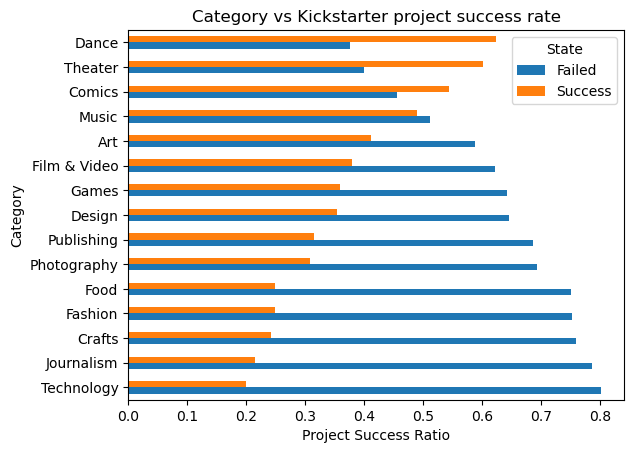

In [98]:
# Plot hortizontal barchart
ax = dfResetCatState.plot.barh(x='Category', y=['Failed', 'Success'])

# Title, x and y axis labels
ax.set_xlabel('Project Success Ratio')
ax.set_ylabel('Category')
ax.set_title('Category vs Kickstarter project success rate')

savePlotFunction(8)

In [99]:
dfCat = dfKickstart['Category']
dfCat


0              Fashion
1         Film & Video
2                  Art
3           Technology
4              Fashion
              ...     
374605           Music
374635      Journalism
374703           Games
374731          Comics
374823           Games
Name: Category, Length: 372055, dtype: object

In [100]:
dfCat.value_counts()

Category
Film & Video    62362
Music           49248
Publishing      39079
Games           34938
Technology      32185
Design          29760
Art             27957
Food            24416
Fashion         22562
Theater         10870
Comics          10743
Photography     10730
Crafts           8733
Journalism       4723
Dance            3749
Name: count, dtype: int64

In [101]:
dfCatCount = dfCat.value_counts()

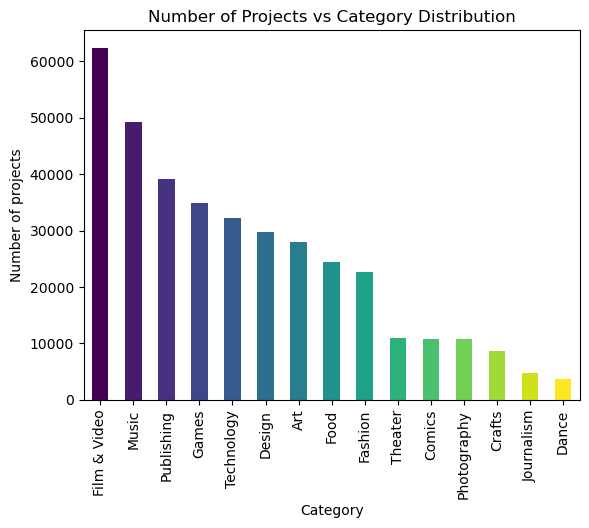

In [102]:

num_bars = len(dfCatCount)
# Set colour
cmap = plt.get_cmap('viridis')
colors=cmap(np.linspace(0,1, num_bars))

# Plot bar chart
ax = dfCatCount.plot(kind='bar', color=colors)
                            
# Set title and labels
plt.title('Number of Projects vs Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of projects')

savePlotFunction(9)

### Seperate Backers, Pledged, Goal intro 3 groups 

In [104]:
dfBack = dfKickstart['Backers']

In [105]:
dfBack.value_counts()

Backers
0       51256
1       34530
2       22996
3       15929
4       11954
        ...  
3463        1
7794        1
1657        1
1819        1
2296        1
Name: count, Length: 3952, dtype: int64

In [106]:
dfBackCount = dfBack.value_counts()

In [107]:
dfBackCount.describe()

count     3952.000000
mean        94.143472
std       1158.901092
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max      51256.000000
Name: count, dtype: float64

In [108]:
# backConditions = [
#     dfKickstart['Backers'] > 100,
#     (dfKickstart['Backers'] >= 50) & (dfKickstart['Backers'] <=100),
#     dfKickstart['Backers'] < 50
# ]


In [421]:
def backCategorize(row):
    if row['Backers'] > 50: 
        return 'Mass_appeal'
    elif row['Backers'] >=10:
        return 'Moderate_scale'
    else:
        return 'Small_scale'
dfKickstart['Back_grouping'] = dfKickstart.apply(backCategorize, axis=1)

In [422]:
dfKickstart.head()

,Category,Category_encoded,Subcategory,Subcategory_encoded,Country,Country_encoded,Duration,Goal,Pledged,Backers,State,Back_grouping
0,Fashion,0.247895,Fashion,0.256988,United_States,0.375755,40,1000,625,30,0,Moderate_scale
1,Film & Video,0.378628,Shorts,0.542036,United_States,0.375755,88,80000,22,3,0,Small_scale
2,Art,0.411704,Illustration,0.518826,United_States,0.375755,9,20,35,3,1,Small_scale
3,Technology,0.199876,Software,0.123011,United_States,0.375755,80,99,145,25,1,Moderate_scale
4,Fashion,0.247895,Fashion,0.256988,United_States,0.375755,29,1900,387,10,0,Moderate_scale


In [425]:
dfBackValueCount = dfKickstart['Back_grouping']

In [427]:
dfBackValueCount.value_counts()

Back_grouping
Small_scale       172967
Mass_appeal       100714
Moderate_scale     98374
Name: count, dtype: int64

In [429]:
dfBackTotalCount = dfBackValueCount.value_counts()
dfBackTotalCount

Back_grouping
Small_scale       172967
Mass_appeal       100714
Moderate_scale     98374
Name: count, dtype: int64

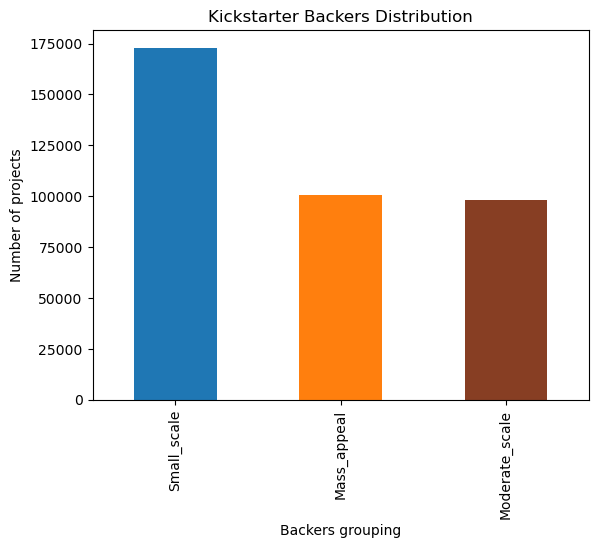

In [431]:
# Plot bar chart
ax = dfBackTotalCount.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#873e23'])

# Title and labels
plt.title('Kickstarter Backers Distribution')
plt.xlabel('Backers grouping')
plt.ylabel('Number of projects')

savePlotFunction(10)

In [115]:
savePlotFunction(10)

<Figure size 640x480 with 0 Axes>

In [116]:
def boxplotFeatureFunction(dataframe, feature, imageNum):
    sns.boxplot(data=dfNumeric, x='State', y=feature, hue='State').set(
        title= f"{feature.capitalize()} vs. Success of Kickstart Project")
    savePlotFunction(imageNum)
    return

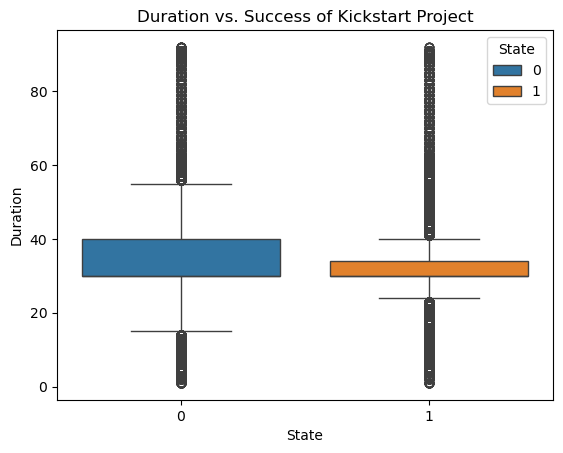

In [117]:
boxplotFeatureFunction(dfNumeric, 'Duration', 11)

In [118]:
dfNumeric.columns.values

array(['Category_encoded', 'Subcategory_encoded', 'Country_encoded',
       'Duration', 'Goal', 'Pledged', 'Backers', 'State'], dtype=object)

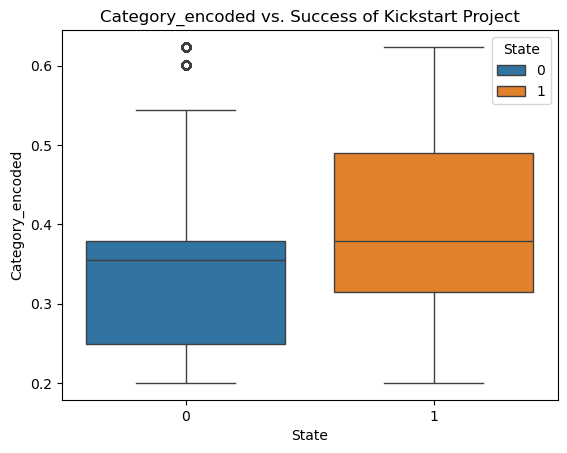

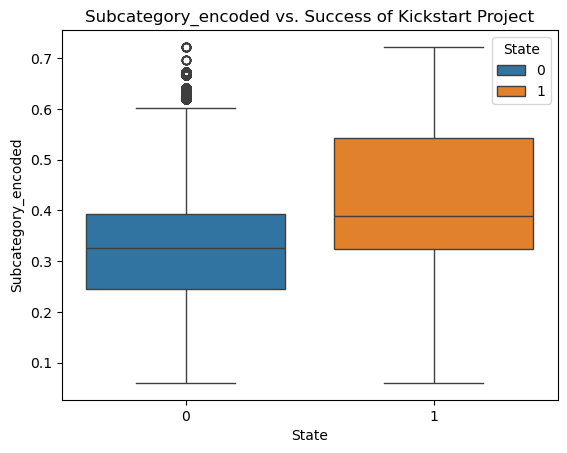

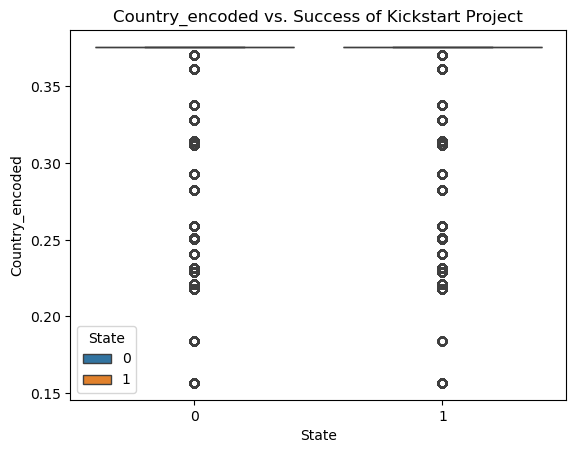

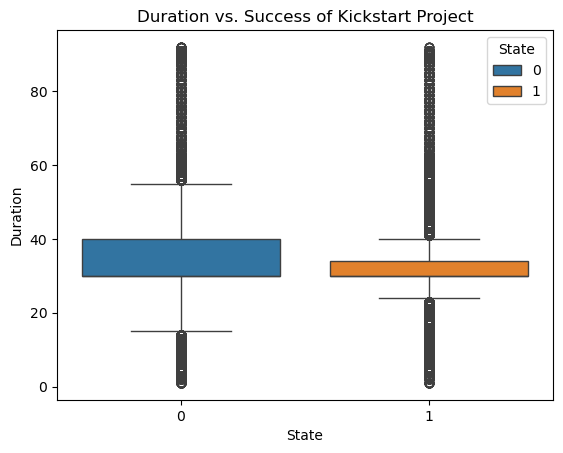

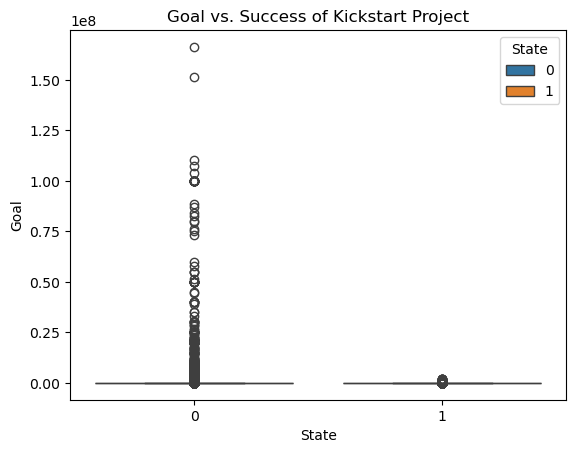

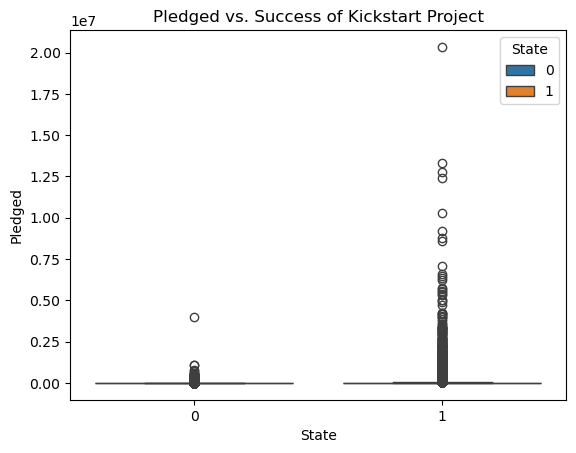

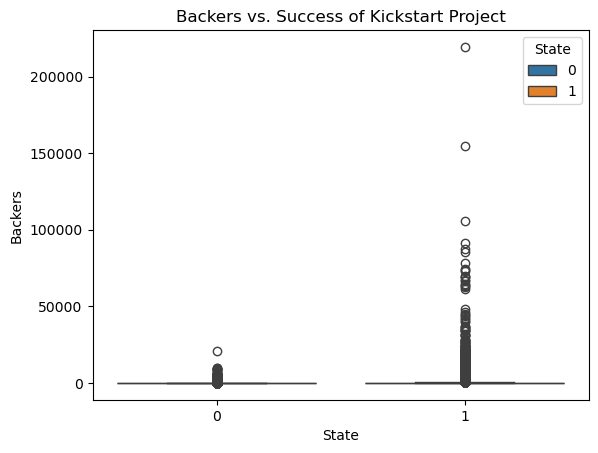

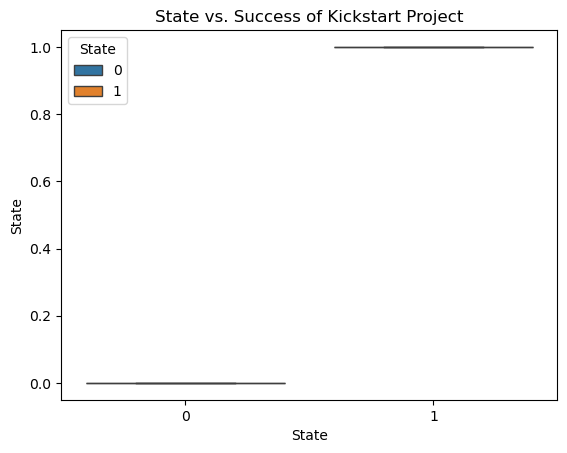

CPU times: total: 8.17 s
Wall time: 8.26 s


In [119]:
%%time
for index, i in enumerate(dfNumeric.columns):
    imgNum = index + 15
    boxplotFeatureFunction(dfNumeric, i, imgNum)

## Path to model notebook

In [121]:
filepath = Path('mini_project02.csv')
filepath.parent.mkdir(parents= True, exist_ok=True)
dfNumeric.to_csv(filepath, index=False)

## Define X and y 



In [123]:
dfNumeric.head()

,Category_encoded,Subcategory_encoded,Country_encoded,Duration,Goal,Pledged,Backers,State
0,0.247895,0.256988,0.375755,40,1000,625,30,0
1,0.378628,0.542036,0.375755,88,80000,22,3,0
2,0.411704,0.518826,0.375755,9,20,35,3,1
3,0.199876,0.123011,0.375755,80,99,145,25,1
4,0.247895,0.256988,0.375755,29,1900,387,10,0


In [124]:
dfNumeric.head()

,Category_encoded,Subcategory_encoded,Country_encoded,Duration,Goal,Pledged,Backers,State
0,0.247895,0.256988,0.375755,40,1000,625,30,0
1,0.378628,0.542036,0.375755,88,80000,22,3,0
2,0.411704,0.518826,0.375755,9,20,35,3,1
3,0.199876,0.123011,0.375755,80,99,145,25,1
4,0.247895,0.256988,0.375755,29,1900,387,10,0


In [125]:
dfSample = dfNumeric.sample(n=100000, random_state=42)

In [126]:
# Select independant variables 'X'
predict_cols = [c for c in dfSample.columns if c != 'State']
predict_cols[:4]

['Category_encoded', 'Subcategory_encoded', 'Country_encoded', 'Duration']

In [127]:
X = pd.DataFrame(dfSample, columns = predict_cols[:4])
X.head()

,Category_encoded,Subcategory_encoded,Country_encoded,Duration
329776,0.358292,0.559062,0.361374,39
144667,0.249222,0.287872,0.375755,34
234044,0.242185,0.250918,0.258721,30
36434,0.314747,0.269747,0.375755,60
353620,0.354469,0.360667,0.314513,30


In [128]:
# sc = StandardScaler()
# X = sc.fit_transform(X)

In [129]:
X=pd.DataFrame(X, columns = predict_cols[:4])
X.head()

,Category_encoded,Subcategory_encoded,Country_encoded,Duration
329776,0.358292,0.559062,0.361374,39
144667,0.249222,0.287872,0.375755,34
234044,0.242185,0.250918,0.258721,30
36434,0.314747,0.269747,0.375755,60
353620,0.354469,0.360667,0.314513,30


In [130]:
X.shape

(100000, 4)

In [131]:
y = dfSample['State']
y

329776    1
144667    1
234044    0
36434     0
353620    0
         ..
124022    0
92713     0
146818    0
298340    1
55525     0
Name: State, Length: 100000, dtype: int64

In [132]:
y.shape

(100000,)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
X_train.shape

(80000, 4)

In [135]:
X_test.shape

(20000, 4)

In [136]:
y_train.shape

(80000,)

In [137]:
y_test.shape

(20000,)

## Logistic Regression Model (01)

In [139]:
#Build logistic regression Model
logReg = LogisticRegression(max_iter=1000)

In [140]:
%%time
# fit model
logReg.fit(X_train, y_train)

CPU times: total: 1.06 s
Wall time: 270 ms


LogisticRegression(max_iter=1000)

Predict method applied to logReg with test features as input = predicted class y_pred

In [142]:
y_pred01 = logReg.predict(X_test)
y_pred01

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [143]:
y_pred01.shape

(20000,)

In [144]:
y_pred_prob01 = logReg.predict_proba(X_test)
y_pred_prob01

array([[0.3487284 , 0.6512716 ],
       [0.70825038, 0.29174962],
       [0.51378225, 0.48621775],
       ...,
       [0.3672238 , 0.6327762 ],
       [0.73370137, 0.26629863],
       [0.71156886, 0.28843114]])

In [145]:
logRegscore = logReg.score(X_test, y_test)
logRegscore

0.67565

In [146]:
logRegConfuseMatrix = metrics.confusion_matrix(y_test, y_pred01)
logRegConfuseMatrix

array([[10952,  1863],
       [ 4624,  2561]], dtype=int64)

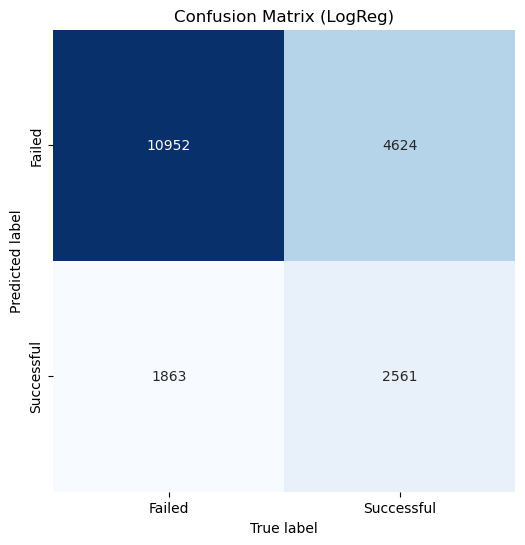

In [147]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Failed', 'Successful')
# Confusion Matrix
sns.heatmap(logRegConfuseMatrix.T, 
            square= True, 
            annot= True, 
            fmt= 'd', 
            cbar= False, 
            cmap= 'Blues', 
            ax= ax,
           xticklabels= confuseLabels, 
            yticklabels= confuseLabels)

# Title and labels
ax.set_title(f'Confusion Matrix (LogReg)')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

savePlotFunction(26)

In [148]:
logRegClassReport = metrics.classification_report(y_test, y_pred01)
print(logRegClassReport)

              precision    recall  f1-score   support

           0       0.70      0.85      0.77     12815
           1       0.58      0.36      0.44      7185

    accuracy                           0.68     20000
   macro avg       0.64      0.61      0.61     20000
weighted avg       0.66      0.68      0.65     20000



## Bernoulli Model (02)


In [150]:
# create Bernoulli model
gnb = BernoulliNB()

In [151]:
gnb.fit(X_train, y_train) 

BernoulliNB()

In [152]:
y_pred02 = gnb.predict(X_test)
y_pred02

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

The predict_proba() function is designed to give the probability estimates for each class label in a classification task. This is particularly useful in applications where understanding the confidence of a prediction is as important as the prediction itself

In [154]:
y_pred_prob02 = gnb.predict_proba(X_test)
y_pred_prob02

array([[0.63882638, 0.36117362],
       [0.63882638, 0.36117362],
       [0.63882638, 0.36117362],
       ...,
       [0.63882638, 0.36117362],
       [0.63882638, 0.36117362],
       [0.63882638, 0.36117362]])

In [155]:
mnbScore = gnb.score(X_test, y_test)
mnbScore

0.64075

In [156]:
gnbConfuseMatrix = metrics.confusion_matrix(y_test, y_pred02)
gnbConfuseMatrix

array([[12815,     0],
       [ 7185,     0]], dtype=int64)

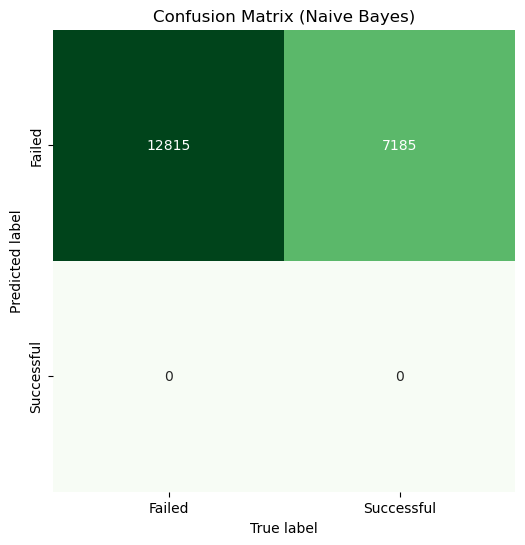

In [157]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

# Confusion Matrix
sns.heatmap(gnbConfuseMatrix.T, 
            square= True, 
            annot= True, 
            fmt= 'd', 
            cbar= False, 
            cmap= 'Greens', 
            ax= ax,
           xticklabels= confuseLabels, 
            yticklabels= confuseLabels)

# Title and labels
confuseLables = ('Failed', 'Successful')
ax.set_title(f'Confusion Matrix (Naive Bayes)')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

savePlotFunction(27)

In [158]:
gnbClassReport = metrics.classification_report(y_test, y_pred02)
print(gnbClassReport)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78     12815
           1       0.00      0.00      0.00      7185

    accuracy                           0.64     20000
   macro avg       0.32      0.50      0.39     20000
weighted avg       0.41      0.64      0.50     20000



C:\Users\hjame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hjame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hjame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Random Forest Model (03)

In [160]:
ranFor = RandomForestClassifier(max_depth=5)

In [161]:
ranFor.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [162]:
y_pred03 = ranFor.predict(X_test)
y_pred03

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [163]:
ranFor.score(X_test, y_test)

0.6799

In [164]:
ranForConfuseMatrix = confusion_matrix(y_test, y_pred03)
ranForConfuseMatrix

array([[11284,  1531],
       [ 4871,  2314]], dtype=int64)

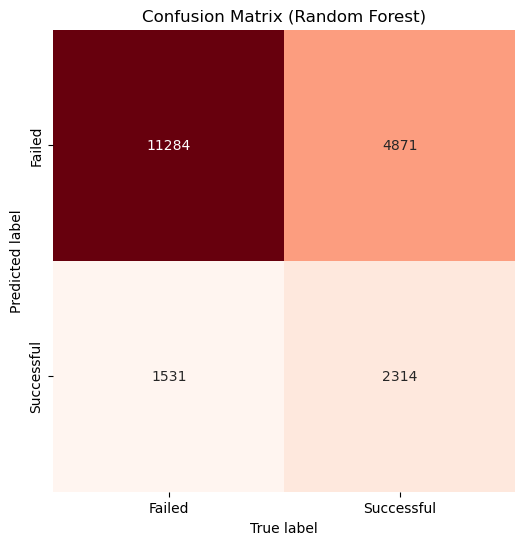

In [165]:
# Plot
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Failed', 'Successful')

# Confusion Matrix
sns.heatmap(ranForConfuseMatrix.T, 
            square= True, 
            annot= True, 
            fmt= 'd', 
            cbar= False, 
            cmap= 'Reds', 
            ax= ax,
            xticklabels= confuseLabels, 
            yticklabels= confuseLabels)

# Title and labels 
ax.set_title(f'Confusion Matrix (Random Forest)')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')


savePlotFunction(28)

In [166]:
ranForClassReport = classification_report(y_test, y_pred03)
print(ranForClassReport)

              precision    recall  f1-score   support

           0       0.70      0.88      0.78     12815
           1       0.60      0.32      0.42      7185

    accuracy                           0.68     20000
   macro avg       0.65      0.60      0.60     20000
weighted avg       0.66      0.68      0.65     20000



In [167]:
ranForFeatures = pd.DataFrame(ranFor.feature_importances_, index = X.columns)
ranForFeatures.head(29)

,0
Category_encoded,0.158411
Subcategory_encoded,0.645713
Country_encoded,0.021928
Duration,0.173948


## ROC curve no hyper parameters

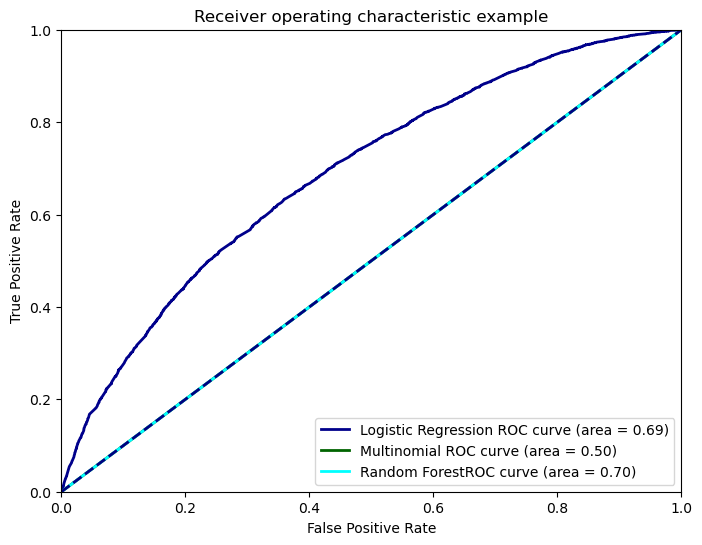

In [169]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds01 = logReg.predict_proba(X_test)[:,1]
preds02 = gnb.predict_proba(X_test)[:,1]
preds03 = ranFor.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr01, tpr01, _ = metrics.roc_curve(y_test, preds01)
fpr02, tpr02, _ = metrics.roc_curve(y_test, preds02)
fpr03, tpr03, _ = metrics.roc_curve(y_test, preds03)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc01 = metrics.auc(fpr01, tpr01)
roc_auc02 = metrics.auc(fpr02, tpr02)
roc_auc03 = metrics.auc(fpr03, tpr03)

# Plot the ROC Curve
plt.figure(figsize =(8, 6))
lw = 2
plt.plot(fpr01, tpr01, color='darkblue', lw = lw, label = 'Logistic Regression ROC curve (area = %0.2f)' % roc_auc01)
plt.plot(fpr02, tpr02, color='darkgreen', lw = lw, label = 'Multinomial ROC curve (area = %0.2f)' % roc_auc02)
plt.plot(fpr02, tpr02, color='aqua', lw = lw, label = 'Random ForestROC curve (area = %0.2f)' % roc_auc03)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

## Logistic Regression Model (04)
* With hyper parameter tuning

In [171]:
logRegMod04 = LogisticRegression()

Syntax for penalty
* l1 = Lasso regularization
* l2 = Ridge regularization
* elasticnet = combination of lasso and ridge

solver
* lbfgs and sag = large datasets
* liblinear = using l1 lasso penalty
* saga = elasticnet

max_iter = number of iterations solver will run, ensuring convergence

In [173]:
# logReg_param_grid = [{
#     'penalty' : ['l1', 'l2', 'elasticnet',],
#     'solver' : ['lbfgs', 'liblinear', 'sag', 'saga'],
#     'max_iter' : [1000, 5000, 10000]
#                   }]
    

In [174]:
# logReg_grid_search = GridSearchCV(logRegMod04,
#                                   logReg_param_grid,
#                                   cv=2,
#                                   scoring='accuracy',
#                                   n_jobs=-1)

In [175]:
# %%time
# logReg_grid_search.fit(X, y)

In [176]:
# logReg_grid_search.best_score_

In [177]:
# logReg_grid_search.best_params_

In [178]:
logRegHP = LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs', C=1)

In [179]:
%%time
logRegHP.fit(X_train, y_train)

CPU times: total: 766 ms
Wall time: 199 ms


LogisticRegression(C=1, max_iter=1000)

In [180]:
y_pred04 = logRegHP.predict(X_test)
y_pred04

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [181]:
y_pred_prob04 = logRegHP.predict_proba(X_test)
y_pred_prob04

array([[0.3487284 , 0.6512716 ],
       [0.70825038, 0.29174962],
       [0.51378225, 0.48621775],
       ...,
       [0.3672238 , 0.6327762 ],
       [0.73370137, 0.26629863],
       [0.71156886, 0.28843114]])

In [182]:
accuracy04 = accuracy_score(y_test, y_pred04)
accuracy04

0.67565

In [183]:
cmLogRegHp = metrics.confusion_matrix(y_test, y_pred04)
cmLogRegHp

array([[10952,  1863],
       [ 4624,  2561]], dtype=int64)

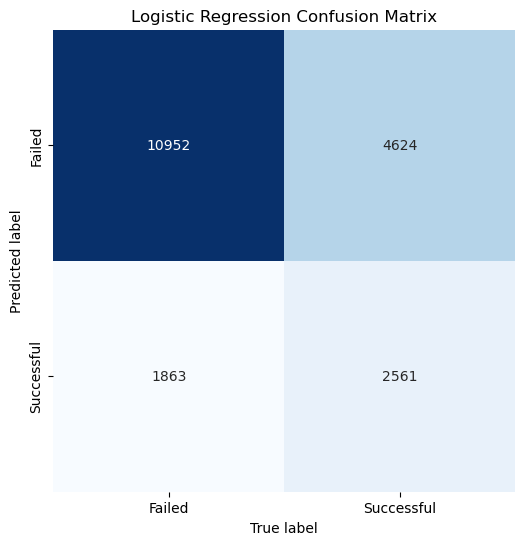

In [184]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

# Confusion Matrix
sns.heatmap(cmLogRegHp.T, 
            square= True, 
            annot= True, 
            fmt= 'd',
            cbar= False, 
            cmap= 'Blues', 
            ax= ax,
           xticklabels= confuseLabels, 
            yticklabels= confuseLabels)

# Title 
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

savePlotFunction(30)

In [185]:
logRegClassReport = classification_report(y_test, y_pred04)
print(logRegClassReport)

              precision    recall  f1-score   support

           0       0.70      0.85      0.77     12815
           1       0.58      0.36      0.44      7185

    accuracy                           0.68     20000
   macro avg       0.64      0.61      0.61     20000
weighted avg       0.66      0.68      0.65     20000



## Naive Bayes Bernoulli (05)
* With hyper parameter tuning

In [187]:
gnbModel05 = BernoulliNB()

In [188]:
# gnb_param_grid = {
#     'alpha': [0.1, 1.0, 10.0,],
#     'binarize': [0.0, 0.5, 1.0],
# }

In [189]:
# gnb_grid_search = GridSearchCV(gnbModel05,
#                                gnb_param_grid,
#                                cv=5,
#                                scoring='accuracy',
#                                return_train_score=False,
#                                verbose=1)

In [190]:
# %%time
# gnb_grid_search.fit(X_train, y_train)

In [191]:
# gnb_grid_search.best_params_

In [192]:
# gnb_grid_search.best_score_

In [193]:
gnbHP = BernoulliNB(alpha=10.0, binarize=0.5)

In [194]:
%%time
gnbHP.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 18.8 ms


BernoulliNB(alpha=10.0, binarize=0.5)

In [195]:
y_pred05 = gnbHP.predict(X_test)
y_pred05

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [196]:
y_pred_prob05 = gnbHP.predict_proba(X_test)
y_pred_prob05

array([[0.44439512, 0.55560488],
       [0.71346165, 0.28653835],
       [0.71346165, 0.28653835],
       ...,
       [0.44439512, 0.55560488],
       [0.71346165, 0.28653835],
       [0.71346165, 0.28653835]])

In [197]:
accuracy05 = accuracy_score(y_test, y_pred05)
accuracy05

0.66845

In [198]:
gnbHPConfuseMatrix = metrics.confusion_matrix(y_test, y_pred05)
gnbHPConfuseMatrix

array([[10875,  1940],
       [ 4691,  2494]], dtype=int64)

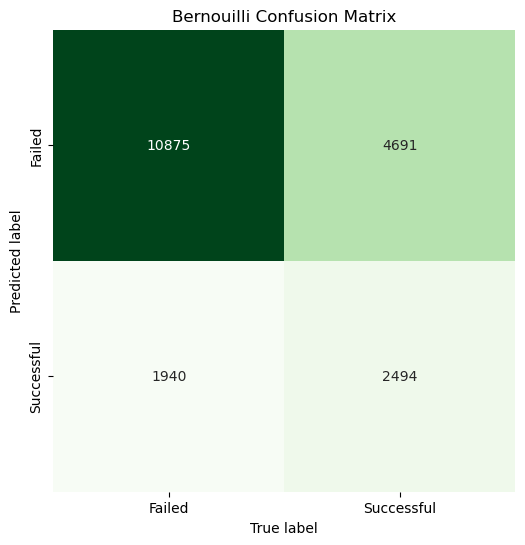

In [199]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

# Confusion Matrix
sns.heatmap(gnbHPConfuseMatrix.T, 
            square= True, 
            annot= True, 
            fmt= 'd',
            cbar= False, 
            cmap= 'Greens', 
            ax= ax,
           xticklabels= confuseLabels, 
            yticklabels= confuseLabels)

# Title 
ax.set_title('Bernouilli Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

savePlotFunction(31)

In [200]:
gnbClassReport = classification_report(y_test, y_pred05)
print(gnbClassReport)

              precision    recall  f1-score   support

           0       0.70      0.85      0.77     12815
           1       0.56      0.35      0.43      7185

    accuracy                           0.67     20000
   macro avg       0.63      0.60      0.60     20000
weighted avg       0.65      0.67      0.65     20000



## Random Forest Model (06)
* With hyper parameter tuning

In [202]:
# ranFor05 = RandomForestClassifier()

In [203]:
# param_grid05 = [{
#     'n_estimators': [500, 1000, 1500],
#     'criterion': ['entropy', 'gini'],
#     'min_samples_split': [5, 10, 15],
#     'min_samples_leaf': [1, 2, 4],
#     'max_depth': [10, 20, 30],
# }]
    

In [204]:
# ranFor_grid_search = GridSearchCV(ranFor05,
#                              param_grid05,
#                              cv=2,
#                              scoring='accuracy',
#                              n_jobs=-1)

In [205]:
# %%time
# ranFor_grid_search.fit(X_train, y_train)

In [206]:
# ranFor_grid_search.best_params_

In [207]:
# ranFor_grid_search.best_score_

In [208]:
ranForHP = RandomForestClassifier(n_estimators= 100,
                                  criterion= 'gini',
                                  min_samples_split= 5,
                                  min_samples_leaf= 1,
                                  max_depth= 10,
                                 )

In [209]:
%%time
ranForHP.fit(X_train, y_train)

CPU times: total: 4.33 s
Wall time: 4.37 s


RandomForestClassifier(max_depth=10, min_samples_split=5)

In [210]:
y_pred06 = ranForHP.predict(X_test)
y_pred06

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [211]:
y_pred_prob06 = ranForHP.predict_proba(X_test)
y_pred_prob06

array([[0.29342692, 0.70657308],
       [0.77401986, 0.22598014],
       [0.55772951, 0.44227049],
       ...,
       [0.30828643, 0.69171357],
       [0.78573018, 0.21426982],
       [0.73960068, 0.26039932]])

In [212]:
accuracy06 = accuracy_score(y_test, y_pred06)
accuracy06

0.6826

In [213]:
ranForHPConfuseMatrix = metrics.confusion_matrix(y_test, y_pred06)
ranForHPConfuseMatrix

array([[11134,  1681],
       [ 4667,  2518]], dtype=int64)

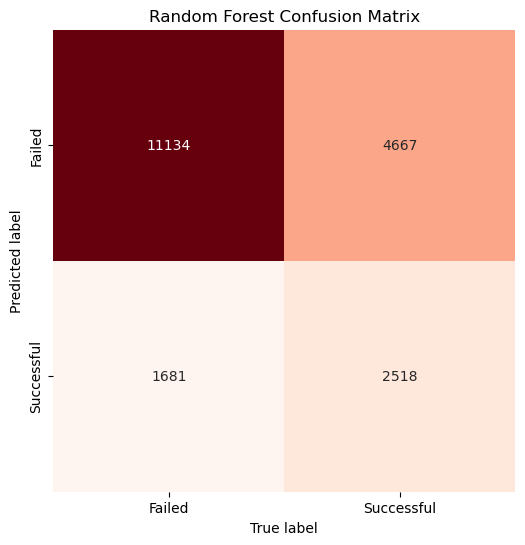

In [214]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

# Confusion Matrix
sns.heatmap(ranForHPConfuseMatrix.T, 
            square= True, 
            annot= True, 
            fmt= 'd',
            cbar= False, 
            cmap= 'Reds', 
            ax= ax,
           xticklabels= confuseLabels, 
            yticklabels= confuseLabels)

# Title 
ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

savePlotFunction(32)

In [215]:
ranForClassReport = classification_report(y_test, y_pred06)
print(ranForClassReport)

              precision    recall  f1-score   support

           0       0.70      0.87      0.78     12815
           1       0.60      0.35      0.44      7185

    accuracy                           0.68     20000
   macro avg       0.65      0.61      0.61     20000
weighted avg       0.67      0.68      0.66     20000



## ROC Curve

In [217]:
#  # ROC Curve

# # logReg curve 
# y_pred_prob04 = logRegHP.predict_proba(X_test)[:,1]
# fpr4 , tpr4, thresholds04 = roc_curve(y_test, y_pred_prob04)

# # Naive Bayes curve
# y_pred_prob05 = gnbHP.predict_proba(X_test)[:,1]
# fpr5 , tpr5, thresholds05 = roc_curve(y_test, y_pred_prob05)

# # Random Forest curve 
# y_pred_prob06 = ranForHP.predict_proba(X_test)[:,1]
# fpr6 , tpr6, thresholds06 = roc_curve(y_test, y_pred_prob06)


# # Plot
# plt.plot([0,1],[0,1], linestyle ='--', label= "Random Classifier")
# plt.plot(fpr4, tpr4, linestyle='--', label= "Logistic Regression AUROC = %0.2f" % (accuracy04), color='b')
# plt.plot(fpr5, tpr5, linestyle='dotted', label= "Bernoulli AUROC = %0.2f" % (accuracy05), color='g')
# plt.plot(fpr6, tpr6, linestyle='dotted', label= "Random Forest AUROC = %0.2f" % (accuracy06), color='r')
# plt.legend()
# plt.xlabel("1-Specificity(False Positive Rate)")
# plt.ylabel("Sensitivity(True Positive Rate)")
# plt.title('Receiver Operating Characteristic')

# savePlotFunction(33)

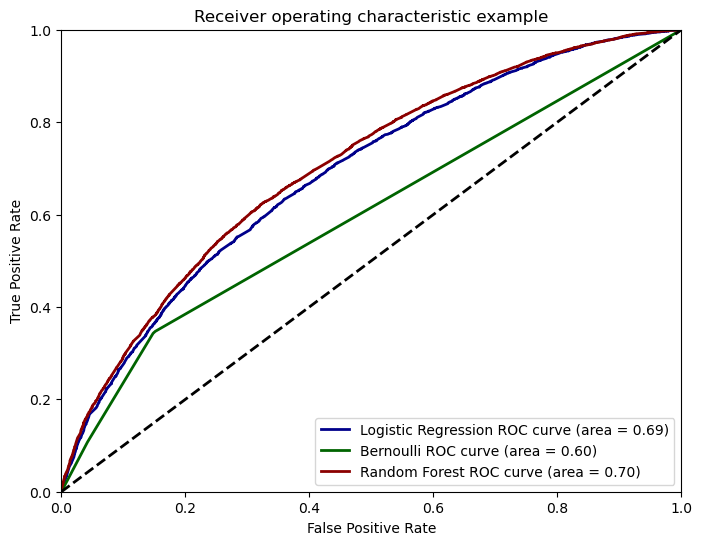

In [218]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds04 = logRegHP.predict_proba(X_test)[:,1]
preds05 = gnbHP.predict_proba(X_test)[:,1]
preds06 = ranForHP.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr04, tpr04, _ = metrics.roc_curve(y_test, preds04)
fpr05, tpr05, _ = metrics.roc_curve(y_test, preds05)
fpr06, tpr06, _ = metrics.roc_curve(y_test, preds06)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc04 = metrics.auc(fpr04, tpr04)
roc_auc05 = metrics.auc(fpr05, tpr05)
roc_auc06 = metrics.auc(fpr06, tpr06)

# Plot the ROC Curve
plt.figure(figsize =(8, 6))
lw = 2
plt.plot(fpr04, tpr04, color='darkblue', lw = lw, label = 'Logistic Regression ROC curve (area = %0.2f)' % roc_auc04)
plt.plot(fpr05, tpr05, color='darkgreen', lw = lw, label = 'Bernoulli ROC curve (area = %0.2f)' % roc_auc05)
plt.plot(fpr06, tpr06, color='darkred', lw = lw, label = 'Random Forest ROC curve (area = %0.2f)' % roc_auc06)
plt.plot([0, 1], [0, 1], color = 'black', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")

savePlotFunction(33)

In [219]:
#  # ROC Curve

# # logReg curve 
# y_pred_prob04 = logRegHP.predict_proba(X_test)[:,1]
# fpr4 , tpr4, thresholds04 = roc_curve(y_test, y_pred_prob04)

# # Naive Bayes curve
# y_pred_prob05 = gnbHP.predict_proba(X_test)[:,1]
# fpr5 , tpr5, thresholds05 = roc_curve(y_test, y_pred_prob05)

# # Random Forest curve 
# y_pred_prob06 = ranForHP.predict_proba(X_test)[:,1]
# fpr6 , tpr6, thresholds06 = roc_curve(y_test, y_pred_prob06)


# # Plot
# plt.plot([0,1],[0,1], linestyle ='--', label= "Random Classifier")
# plt.plot(fpr4, tpr4, linestyle='--', label= "Logistic Regression AUROC = %0.2f" % (accuracy04), color='b')
# plt.plot(fpr5, tpr5, linestyle='dotted', label= "Bernoulli AUROC = %0.2f" % (accuracy05), color='g')
# plt.plot(fpr6, tpr6, linestyle='dotted', label= "Random Forest AUROC = %0.2f" % (accuracy06), color='r')
# plt.legend()
# plt.xlim([-0.05, 0.2])
# plt.ylim([0.8, 1.05])
# plt.xlabel("1-Specificity(False Positive Rate)")
# plt.ylabel("Sensitivity(True Positive Rate)")
# plt.title('Receiver Operating Characteristic')

# savePlotFunction(34)

## Learning Curve

In [221]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

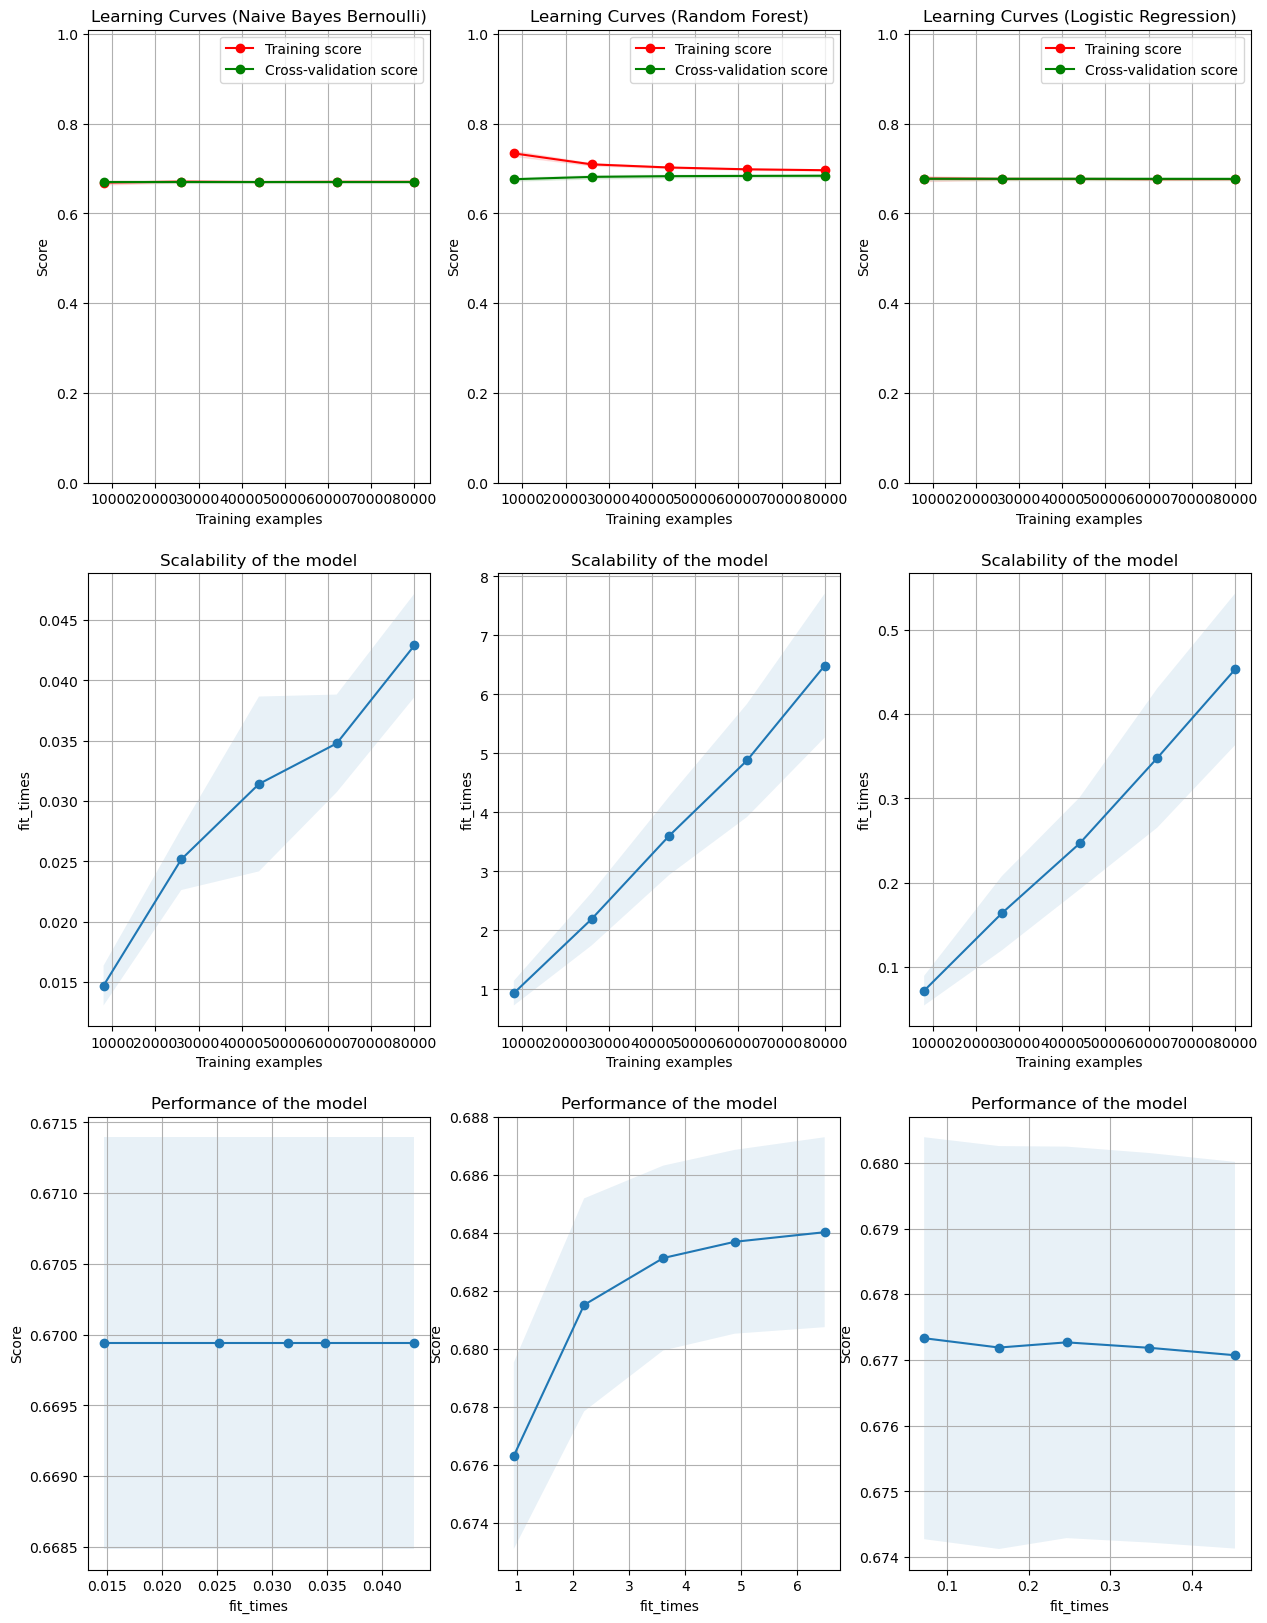

CPU times: total: 42.3 s
Wall time: 5min 19s


In [222]:
%%time
fig, axes = plt.subplots(3, 3, figsize=(15, 20))

# X, y = load_digits(return_X_y=True)

title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits= 50, test_size= 0.2, random_state= 42)

# estimator = LogisticRegression()
estimator = logRegHP
plot_learning_curve(
    estimator, title, X, y, axes= axes[:, 2], ylim= (0.0, 1.01), cv= cv, n_jobs= 4
)


title = "Learning Curves (Naive Bayes Bernoulli)"
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 42)

estimator = gnbHP
plot_learning_curve(
    estimator, title, X, y, axes= axes[:, 0], ylim= (0.0, 1.01), cv= cv, n_jobs= 4
)

# title 
title = r"Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits= 50, test_size= 0.2, random_state= 42)
estimator = ranForHP
plot_learning_curve(
    estimator, title, X, y, axes= axes[:, 1], ylim= (0.0, 1.01), cv= cv, n_jobs= 4
)


savePlotFunction(36)